<a href="https://colab.research.google.com/github/bca2/593/blob/master/CPSC_593.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Population growth and evolution

The purpose of this document is to help Illinois high school science/math teachers comply with the Next Generation Science Standards by providing worked examples for the following learning requirements:

**HS-LS2**

1. Use mathematical and/or computational representations to support explanations of factors that affect carrying capacity of ecosystems at different scales. (HS-LS2-1)
1. Evaluate claims, evidence, and reasoning that the complex interactions in ecosystems maintain relatively consistent numbers and types of organisms in stable conditions, but changing conditions may result in a new ecosystem. (HS-LS2-6)
1. 	Design, evaluate, and refine a solution for reducing the impacts of human activities on the environment and biodiversity. (HS-LS2-7)

**HS-LS3**

1. Apply concepts of statistics and probability to explain the variation and distribution of expressed traits in a population. (HS-LS3-3)


**HS-LS4**

1. Construct an explanation based on evidence that the process of evolution primarily results from four factors: (1) the potential for a species to increase in number, (2) the heritable genetic variation of individuals in a species due to mutation and sexual reproduction, (3) competition for limited resources, and (4) the proliferation of those organisms that are better able to survive and reproduce in the environment. (HS-LS4-2)
1. Apply concepts of statistics and probability to support explanations that organisms with an advantageous heritable trait tend to increase in proportion to organisms lacking this trait. (HS-LS4-3)
1. Construct an explanation based on evidence for how natural selection leads to adaptation of populations. (HS-LS4-4)
1. Evaluate the evidence supporting claims that changes in environmental conditions may result in (1) increases in the number of individuals of some species, (2) the emergence of new species over time, and (3) the extinction of other species. (HS-LS4-5)
1. Create or revise a simulation to test a solution to mitigate adverse impacts of human activity on biodiversity. (HS-LS4-6)

Additionally, this entire lab project was developed with the chromebook in mind.
Everything here should be completely accessible to someone using a chromebook with access to google drive and the internet.

## Outline
1. Population growth
    
    1. Discrete
        1. Geometric growth
        1. Discrete logistic
    1. Continuous
        1. Exponential
        1. Logistic
    1. Calculating observed growth rate using matrix math
        1. What does the observed rate mean?
        1. How do we separate the growth rate from the carrying capacity drag?
    
    1. Worked example using simulated data
    
1. Invasive species

    1. What is an invasive species, why don't we like them?
    1. Invasive/Native species and population growth: Determining where to allocate funds when it comes it environmental protection.

1. Evolution of herbicide resistance

    1. Herbicide resistance: what is it?
    1. How do weed populations evolve to be resistant to herbicide?
    1. Worked example: 3 different genotypes/phenotypes sprayed with herbicide over time.
        1. How would we model this assuming



# Python and R (and coding in general)

&nbsp;
Python is a programming language primarily suited for development while R is suited for data analysis.
In my experience it's a mistake to choose one language and eschew others: learn as many as possible because  it's hard to know which will be the most useful to you in the future.
Also, keep in mind that these are not the only languages.

&nbsp;
The nice thing about learning code is that there's a certain logical flow that seems to be consistent between languages.
Named functions and syntax may differ, but the logic will be very similar in general.
In this document I will try to provide examples of both python and R code.


&nbsp;
Also: my degree is not in computer science, and there may be better and more efficient ways of writing this code.
That's fine.
Your own code doesn't have to be perfect the first time around.
It doesn't have to be perfect ever.
Just make sure that it does what you want, and make improvements as you learn.

## Enable R within Python

The following code allows us to use the R language and R commands within Python.

Any code that starts with "%%R" is using the R programming language.
If that prompt is not present then the code is Python.


In [0]:
# The following code lets us speak in the R language while working from within Python

%load_ext rpy2.ipython

# Using R inside python in this way tends to produce warnings
# The warnings don't seem to have an effect on the desired output, so I'm just going to suppress the warnings.
# You can go ahead and run the code with and without warnings by excluding/including the following code:

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

# To comment out code, just use the pound sign (hashtag) "#"
# Code that's been commented out will not be run, just like this comment I'm writing right now.
# Comments help us in two major ways:
#   1. You can easily leave instructions or clarifications in your code for other people or for future you.
#   2. You can see how your code runs without certain lines of code without actually deleting your code.
#       My advice: Try not to delete your code. You may change your mind later, and it's good to have it readily available.

## Markdown

&nbsp;
The text portions of this document are written in markdown.
Markdown can fairly easily be converted to .doc, .pdf, and html using pandoc.
I believe that Google Colab just converts everything to html on the fly, and that there are currently no .doc and .pdf options (as far as I know).
However, these options do exist within programs like Rstudio (an integrated development environment (IDE) for R) and it's very useful for creating statistical reports.

[See the guide for more details](https://www.markdownguide.org/basic-syntax/)

# Models: What are they, and why are they useful?

There are 2 main types of models that concern us in biology.



1. Biological or mechanistic models.

1. Statistical models

&nbsp;
The difference between biological models and statistical models is generally quite large.
Biological models tend to be descriptive or conceptual, while statistical models are mathematical in nature.
That doesn't mean that biological models can't be mathematical (matrix population models are mathematical).

&nbsp;
Additionally: it's important that you remember a quote generally attributed to a famous statistician:

---
> "All models are wrong, but some are useful." - George Box
---

Whether he said it or not is irrelevant.
The point is that every model, no matter how complex, is just an approximation to real life.
When creating a model it's important that it describes all of the features of interest reasonably well without being too complex.
In other words, you should try to make your model as simple as possible while still being able to describe the phenomena of interest.


## Biological models

Biological models tend to describe how we imagine biologial processes to work.

There are molecular models that described how DNA is replicated and how enzymes interact with substrates.

There are population models that describe how survival and fecundity at each point in an organisms life affect overall population dynamics and growth.

There are ecological models that describe nutrient cycling and weather patterns.

## Simple population model for an annual plant

This is an example of a biological model that represents the lifecycle of a summer annual plant.
Each arrow represents a transition period.
The arrow from seed (time =t) to seedling is a germination transition.
In other words, what is the proportion of seeds in the seedbank that germinate and reach the seedling stage?
In fact all of the arrows here represent transitions that we measure as probabilities (germination or survival) except for the arrow from Adult to seed (time =t+1) which is a fecundity measurement.
Fecundity is the number of seeds produced by mature plants.


We'll see later that this model is both conceptual and mathematical: it is isomorphic to a set of mathematical matrices that, when multiplied together, calculate the population growth rate.
We won't be going into any serious linear algebra problems, this model can be represented by a single linear equation (that we'll see later).


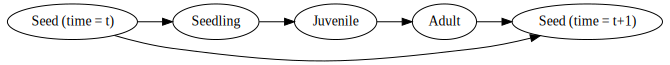

In [0]:
#@title Annual plant lifecycle
import graphviz

annual=graphviz.Digraph()
annual.node("A", "Seed (time = t)")
annual.node("B", "Seedling")
annual.node("C", "Juvenile")
annual.node("D", "Adult")
annual.node("E", "Seed (time = t+1)")

annual.edge("A","B")
annual.edge("B","C")
annual.edge("C","D")
annual.edge("D","E")
annual.edge("A","E",constraint="false")

annual.graph_attr['rankdir'] = 'LR'

annual


## Statistical models

# Population growth

Before we start talking about carrying capacities and evolution, we should at least have a reasonable mathematical representation of how we can think about population growth.
There are many different ways to model population growth, but we'll focus on just two of them here.

## Geometric growth

Geometric growth occurs when the population growth rate remains constant and there are very few or no environmental limitations.
This type of growth is common during the early stages of population growth but generally does not continue for very long.
Additionally, geometric growth is used to describe populations that reproduce in a pulsed, all at the same time.
To make this more clear, think about how annual plants reproduce compared to humans.
Members from an annual plant species germinate and reproduce at approximately the same times every year.
By contrast, humans can continually reproduce all year.
It turns out that these two types of populations are described by different (but analagous) models.

Let $P_{t}$ represent the population size at time $t$, $P_{t+1}$ represent the population size at time $t+1$ and $r$ represent the *per capita* rate of increase.

$$P_{t+1} =  P_{t} + r \cdot P_{t}$$

That is to say, the future population size is a function of the current population size as well as a rate of population growth.

Let's take a look at how $r$ affects the relationship between $P_{t}$ and $P_{t+1}$.
First, observe that if $r$ is equal to zero then:

$$P_{t+1} =  P_{t}$$

If there's no net growth then the population stays the same size.

What about positive or negative values of $r$?
Let's rearange our equation to answer this question. 


$$\frac{P_{t+1}-P_{t}}{P_{t}} =   r  $$


Notice that if $P_{t+1} <  P_{t}$ then $r$ will be negative.
Another way to say that is if we have a negative population growth rate then our population will decline over time.

Similarly, if $P_{t+1} >  P_{t}$ then $r$ will be positive.

Texts may represent the equation like this:

$$P_{t+1} =  P_{t} \cdot (1 + r)$$
$$P_{t+1} =  P_{t} \cdot \lambda$$

Let's graph it!

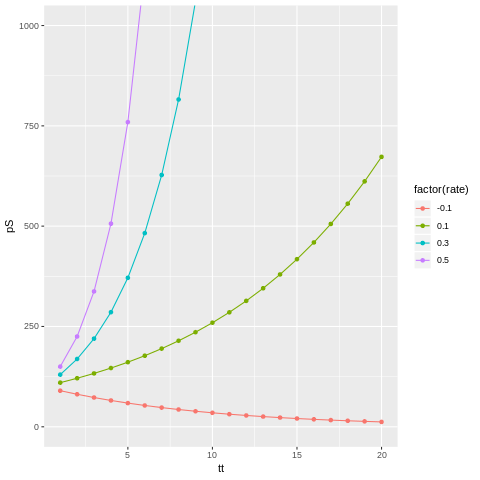

In [0]:
%%R # This tells python that we're speaking in "R" rather than "python"
# Notice that curly brackets in R take the place of indents in python
# Also, notice that for these simulation exmaples there is no outside data.
#  Everything you see comes from the functions and loops that we create here.

library(ggplot2)

geo_pop = function(rate, pop_initial, years){
    size = pop_initial
    
    df = data.frame(tt = as.numeric(),
                   pS = as.numeric(),
                   rate = as.numeric())
    
    currentyear = 1
    
    while (currentyear <= years){
        size = size + rate*size
        
        df[currentyear,1] = currentyear
        df[currentyear,2] = size
        df[currentyear,3] = rate
        
        currentyear = currentyear + 1
    }
    return(df)
}

r = -0.1

df1 = data.frame(tt = as.numeric(),
               pS = as.numeric(),
               rate = as.numeric())

while (r <= 0.5){
    df = geo_pop(r,100,20)
    df1 = rbind(df1,df)
    
    r = r + 0.2
}

plot = ggplot(df1, aes(x = tt, y = pS, group = factor(rate), color = factor(rate)))
plot = plot + geom_point()
plot = plot + geom_line() +
        coord_cartesian(ylim=c(0, 1000))
plot

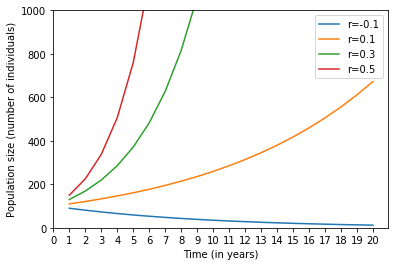

In [0]:
# This is Python code
# I first start by importing "modules" help me graph data and label plots.
# Notice that the pound sign (#) or hashtag results in commenting-out a line of code
# Lines that are commented out will not be run.
#   It's good for notes and comments.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Now we have to define (def) a function (named geo_pop) that will simulate population growth
# Note that we allow the function to take on 3 arguments (inputs):
#   rate, pop_initial, and years.
# 

def geo_pop(rate,pop_initial,years):
    size = pop_initial

    # time t
    tt = []

    #population size 
    pS = []
    
    currentyear=1
    
    while currentyear <= years:
        
        size += rate*size
        
        pS.append(size)
        tt.append(currentyear)     
    
        currentyear += 1
    return tt,pS

r = -0.1
while r <= .5:
    tt,pS = geo_pop(r,100,20)
    plt.plot(tt, pS,label="r="+str(round(r,2)))
    r += .2

plt.ylabel('Population size (number of individuals)')
plt.xlabel('Time (in years)')
plt.xticks(np.arange(0, 21, 1))
plt.ylim(0,1000)
plt.legend()
plt.show()

### Exercise

1. Our equation for geometric growth is 
$$P_{t+1} =  P_{t} + r \cdot P_{t}$$
Notice that, in this form, we need to know $P_t$ to calculate $P_{t+1}$.
But what if I want to know $P_{1000}$ and all the information I have is $r$ and $P_0$.
Do I have to calculate every population value to get $P_{1000}$ or is there a shortcut?

1. Notice that in the exponential graph I've provided that we start at time $t=1$. Why is that? Are you able to rewrite the code so that we start at time $t=0$?

1. Do you think that an geometric model for population growth is useful? Why or why not? What are the benefits and limitations of the model?

#### Solutions

Remember that there may be many solutions to a problem, especially a coding problem.
Your code may be different but still be correct.
The important thing is to determine if the logic behind your code makes sense, and whether or not you get the same answer.

##### Question 1





Let's tackle this question by considering the population size at time $t=3$, $P_3$.

$$P_3 = P_2 + r*P_2$$

which is equal to:

$$P_3 = P_2 \cdot (1 + r)$$

Also:

$$P_2 = P_1 \cdot (1 + r)$$

$$P_1 = P_0 \cdot (1 + r)$$

So we an rewrite the first equation as:

$$P_3 = P_1 \cdot (1 + r) \cdot (1 + r)$$
$$P_3 = P_0 \cdot (1 + r)  \cdot (1 + r) \cdot (1 + r)$$

finally

$$P_3 = P_0 \cdot (1 + r)^3$$.

This is an equation of the form

$$y = c \cdot x^n$$

where $c$ is a constant.

If we want to calculate the population size at time $t=n$ then the equation would be:

$$P_n = P_0 \cdot (1 + r)^n$$.


##### Question 2

**In R**

We move the `df[currentyear, x]` statements ahead of the `size = size + rate*size` statement.
This allows us to store the initial starting values before modifying them with the loop.

**In python**

Just like in R, we can simply move the `.append` arguments up within the `exp_pop` function and then set our starting current year to 0.
Now the first thing that the function will do is set our starting population value as the first value within our list.
We can now start at year = 0 and have everything make sense.

In [0]:
%%R 
library(ggplot2)

geo_pop = function(rate, pop_initial, years){
    size = pop_initial
    
    df = data.frame(tt = as.numeric(),
                   pS = as.numeric(),
                   rate = as.numeric())
    
    currentyear = 1
    
    while (currentyear <= years){
        
        df[currentyear,1] = currentyear
        df[currentyear,2] = size
        df[currentyear,3] = rate
        
        size = size + rate*size        
        
        currentyear = currentyear + 1
    }
    return(df)
}

r = -0.1

df1 = data.frame(tt = as.numeric(),
               pS = as.numeric(),
               rate = as.numeric())

while (r <= 0.5){
    df = geo_pop(r,100,20)
    df1 = rbind(df1,df)
    
    r = r + 0.2
}

plot = ggplot(df1, aes(x = tt, y = pS, group = factor(rate), color = factor(rate)))
plot = plot + geom_point()
plot = plot + geom_line() +
        coord_cartesian(ylim=c(0, 1000))
plot

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def exp_pop(rate,pop_initial,years):
    size = pop_initial

    # time t
    tt = []

    #population size 
    pS = []
    
    currentyear=0
    
    while currentyear <= years:
        
        pS.append(size)
        tt.append(currentyear)
        size += rate*size
     
      
        currentyear += 1
    return tt,pS

r = -0.1
while r <= .5:
    tt,pS = exp_pop(r,100,20)
    plt.plot(tt, pS,label="r="+str(round(r,2)))
    r += .2

plt.ylabel('Population size (number of individuals)')
plt.xlabel('Time (in years)')
plt.xticks(np.arange(0,21, 1.0))
plt.ylim(0,1000)
plt.legend()
plt.show()

##### Question 3

It could be useful.
It really depends on whether the population seems to be well-described by an geometric model at the time of interest.
Populations don't increase geometrically forever, though, and our current model doesn't account for that.
In the next section we'll discuss one possible way of including a "cap" on population growth.

Additionally, geometric growth occurs when members of a population all reproduce at the same time rather than continuously.
Compare the lifecycle of a human to an annual summer plant.
The plant population produces seed at the end of summer or in the fall each and every year.
They don't produce seed in the winter or spring.
Humans, on the other hand, can reproduce all year long.
Geometric models are appropriate for the plant growth (discrete time) and not human growth (continuous time).

## Discrete Logistic growth

Geometric growth is not a reasonable model when the population is contrained by resources.
We have to introduce the concept of **carrying capacity ($K$)**.

Essentially, an area with finite resources (which is every area) has a limit on the population that it can support.
This limit is called the carrying capacity and is equal to the total number of individuals from a population that a specific area can support.
We'll need to account for this in our model somehow.

One way to do this is to include a new term $1-\frac{P_t}{K}$.
Our geometric equation becomes

$$P_{t+1} =  P_{t} + r \cdot P_{t} \cdot (1-\frac{P_t}{K})$$

Think about this new term as a dynamic adjustment to $r$.
When the population ($P_t$) is very small compared to the carrying capacity then
$$1-\frac{P_t}{K} \approx 1-\frac{0}{K} \approx 1$$
indicating no adjustment to $r$. 
$$r \cdot P_t \cdot 1 = r \cdot P_t$$ 

However, as the population increases we apply larger and larger penalties to $r$.

What if $P_t = \frac{1}{2}K$?

$$1-\frac{P_t}{K} = 1-\frac{1}{2} = \frac{1}{2}$$
$$r \cdot P_t \cdot \frac{1}{2} = \frac{1}{2}r \cdot P_t$$

What if $P_t = K$

$$1-\frac{K}{K} = 1-1 = 0$$
$$r \cdot P_t \cdot 0 = 0\cdot r \cdot P_t = 0$$

Again, we can do this in R and Python.
We should be able to reuse most of our previous code, however, we'll need to add in an argument for carrying capacity.






In [0]:
%%R 
library(ggplot2)

geo_pop = function(rate, pop_initial, years, capacity){
    size = pop_initial
    
    df = data.frame(tt = as.numeric(),
                   pS = as.numeric(),
                   rate = as.numeric())
    
    currentyear = 1
    
    while (currentyear <= years){
        
        df[currentyear,1] = currentyear
        df[currentyear,2] = size
        df[currentyear,3] = rate
        
        size = size + rate*size*(1-size/capacity)        
        
        currentyear = currentyear + 1
    }
    return(df)
}

r = -0.1

df1 = data.frame(tt = as.numeric(),
               pS = as.numeric(),
               rate = as.numeric())

while (r <= 0.5){
    df = geo_pop(r,100,20, 1000)
    df1 = rbind(df1,df)
    
    r = r + 0.2
}

plot = ggplot(df1, aes(x = tt, y = pS, group = factor(rate), color = factor(rate)))
plot = plot + geom_point()
plot = plot + geom_line() +
        coord_cartesian(ylim=c(0, 1000))
plot

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def log_pop(rate,pop_initial,years,capacity):
    size = pop_initial

    # time t
    tt = []

    #population size 
    pS = []
    
    currentyear=0
    
    while currentyear <= years:
        
        pS.append(size)
        tt.append(currentyear) 
        
        size += rate*size*(1-size/capacity)         
    
        currentyear += 1
    return tt,pS

r = -0.1
while r <= .5:
    tt,pS = log_pop(r,100,20,1000)
    plt.plot(tt, pS,label="r="+str(round(r,2)))
    r += .2

plt.ylabel('Population size (number of individuals)')
plt.xlabel('Time (in years)')
plt.legend()
plt.xticks(np.arange(0,21, 1.0))
plt.ylim(0,1000)
plt.show()

### Modeling factors that affect $K$

Carrying capacity is affected by resource availability.
Resources are typically things like food or nutrients, water, light, and space.

The carrying capacties for different species can be wildly different interms of which resources are the most important.
That is to say there can be 'choke points' that limit a population.
Every resource may be present in abundance, except for one.
The population carrying capacity, and growth rate, would then be incredibly sensitive to changes in availability of that limiting resource.
Modifying the availability of these limiting resources can have a profound effect on population growth and carrying capacity.
There are generally dimishing returns when you increase any one resource, and our model would have to account for that.
Diminishing returns simply means that the observed effect on the carrying capacity diminishes in size as we add 

For example, as humans we've been able to use technology to increase our carrying capacity substantially.
Agricultural improvements such as pesticides, synthetic nitrogen, and crop genetics have increased the amount of food that we produce per unit area.
Drought tolerant crops decrease the amount of water required for crops leaving more for us as drinking water.
High-rise apartment buildings (or any high-density living areas) conserve space.

In theory, if you had enough time and money, you could determine all the factors that affect the carrying capacity for a species and also determine to which factors the carrying capacity is most sensitive.

Let's run through a simple example in R.
We'll say that we're able to relate carrying capacity to nutrient and space availability using the following formula

$$K \approx \frac{1000*nutrients*space}{nutrients \; + \; 3*space}$$

The equation isn't something I pulled from a paper, it's just for an example.
Notice that if we increase either nutrients or space we should increase the carrying capacity.
However, you'll notice that the degree by which we raise $K$ is dependent on what our starting values are for nutrients and space.
This is to say, the sensitivity of $K$ to either nutrients or space is dependent on the current values of nutrients and space.

Let's take a look!

First we have to import and install an R package.


In [0]:
# import rpy2.robjects.packages as rpackages
# utils = rpackages.importr('utils')

# utils.chooseCRANmirror(ind=1)

# packnames = ('directlabels')
# from rpy2.robjects.vectors import StrVector
# utils.install_packages(StrVector(packnames))

In [0]:
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('directlabels')

Next, we'll simulate our data and make a **contour plot**.

In [0]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(directlabels)

df <- expand.grid(x=1:100, y=1:100)
df$z <- 1000*(df$x*df$y)/(df$x+3*df$y)

df1 = df%>%
      filter(y %in% c(25,50,75,100))
df1$y = as.factor(df1$y)
  
# K vs nutrients

plot = ggplot(aes(x=x,y=z, group=y, colour=y),data=df1)+
        labs(x = "Nutrients", y= "K", colour="Space")
plot = plot + geom_point()
plot = plot + geom_line()
plot

In [0]:
%%R

df2 = df%>%
      filter(x %in% c(25,50,75,100))
df2$x = as.factor(df2$x)
  
# K vs nutrients

plot = ggplot(aes(x=y,y=z, group=x, colour=x),data=df2)+
        labs(x = "Space", y= "K", colour="Nutrients")
plot = plot + geom_point()
plot = plot + geom_line()
plot

In [0]:
%%R
df3 = df%>%
      filter(x==y)
  
plot = ggplot(aes(x=x,y=z),data=df3)+
        labs(x = "Space", y= "K", colour="Nutrientss")
plot = plot + geom_point()
plot = plot + geom_line()
plot

In [0]:
%%R
# The contour plot

p <- ggplot(aes(x=x, y=y, z=z), data = df) + 
     geom_raster(data=df, aes(fill=z), show.legend = TRUE) +
     scale_fill_gradient(limits=range(df$z), high = 'orange', low = 'blue') + 
     geom_contour(aes(colour = ..level..)) +
     scale_colour_gradient(guide = 'none') +
     labs(x = "Nutrients", y= "Space", fill="K")+
     scale_y_continuous(breaks=seq(0,100,5))+
     scale_x_continuous(breaks=seq(0,100,5))

p = direct.label(p, list("far.from.others.borders", "calc.boxes", "enlarge.box", 
      hjust = 1, vjust = 1, box.color = NA, fill = "transparent", "draw.rects"))
p

In [0]:
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('plotly')

In [0]:
%%R
library(plotly)
# volcano is a numeric matrix that ships with R
p <- plot_ly(z = ~volcano) %>% add_surface(
  contours = list(
    z = list(
      show=TRUE,
      usecolormap=TRUE,
      highlightcolor="#ff0000",
      project=list(z=TRUE)
      )
    )
  ) %>%
  layout(
    scene = list(
      camera=list(
        eye = list(x=1.87, y=0.88, z=-0.64)
        )
      )
  )

Sys.setenv("plotly_username"="bca2")
Sys.setenv("plotly_api_key"="cSN2HhSsINgqgrmT4iJL")

chart_link = api_create(p, filename="test-1")
chart_link

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))


In [0]:
# Connecting to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

from plotly.offline import iplot, plot, download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go



import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

data = [
    go.Surface(
        z=z_data.as_matrix(),
        contours=go.surface.Contours(
            z=go.surface.contours.Z(
              show=True,
              usecolormap=True,
              highlightcolor="#42f462",
              project=dict(z=True)
            )
        )
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    scene=dict(camera=dict(eye=dict(x=1.87, y=0.88, z=-0.64))),
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)

# this saves it to Google Drive ...you can put it in any folder you like
plot(fig, filename="/content/drive/test.html", auto_open=False)

# this saves it within the notebook folder locallhy
plot(fig, filename="/content/drive/test.html", auto_open=False)

### How to read a contour plot

Here we represent 3 variables (nutrients, space, carrying capacity ($K$)).

You may have never seen a contour plot before, and that's fine.
Contour plots are the best way (in my opinion) to represent 3D information in a 2D format.
Imagine that you're using a paper map.
A paper map is a 2D object that can nicely represent distances on the North-South axis as well as the West-East axis.
But what if you wanted a little more information?
Something like the elevation of a point on the map?
These maps exist and are called "Topographical maps", and are equivalent to contour plots.

Notice the curved lines on our graph.
Those lines are associated with a value for our third variable.
For a topographical map that value would be elevation.
For our graph, that value is the carrying capacity.

For our graph, as you increase nutrients **_and_** space we increase the carrying capacity substantially.
However, notice that there are locations on the graph where carrying capacity is only sensitive to one variable or the other.

For example, what if our nutrients value is equal to 80 and the space value is equal to 15.
What would increase the carrying capacity more: increasing nutrients by 20 or space by 20?


### Exercises

#### Solutions

##### Question 1

### Exponential and logistic growth

- Requires some background in calculus?
- Will they have this?

## Calculating $r$ (or $\lambda$) (parameterizing the equation from data)

The modern way of parameterizing a population growth equation from data would be to run a non-linear regression.

However, since we don't have that skill yet, we'll have to rely on other tactics for now.

Regardless of which model we use (exponential or logistic), we'll have to generate a reasonable estimate of the population growth rate $r$.
Also, if we decide to use the logistic model then we'll have to determine an estimate of the carrying capacity.

# Population demographics: Case Study using simple statistics

The Illinois Department of Natural resources has enlisted this group to help analyze data regarding alien and native plants within Illinois. 
There are two main concerns: First, you must uphold a directive to protect the environment from invasive species.
Second, you must be able to identify and protect any native plants that may be dying off.

Invasive species are defined here as alien plants with a population growth rate significantly greater than 1. 
These species out-compete native species and tend to lower the biodiversity of regions.
The population growth rate is the average rate at which a population increases in size from year to year.
It is analogous to financial gains year to year and is often abbreviated by the Greek letter lambda in the literature.

A population growth rate is analogous to financial growth and should be treated in the same way (it's just an annual growth rate).
If your financial investment has a 9% gain from one year to the next, then your rate of financial growth would be 1.09.

$$Money_{year 1}\cdot 1.09 = Money_{year 2}$$

If your financial investment has an 11% loss from one year to the next then your financial growth for that year would be 0.89.

$$Money_{year 1}\cdot 0.89 = Money_{year 2}$$

Populations with a growth rate significantly greater than 1 are increasing, and therefore potentially weedy or invasive.
Populations with a growth rate significantly less than 1 are decreasing, and therefore may require human intervention to save.
For this problem, we're primarily concerned with identifying alien species with a population growth rate greater than 1, and native species with a population growth rate less than 1.d

The data that have been collected consist of 3 datasets, each one tracking a different population statistic for 16 species found in the Champaign county. 
The first dataset is from the summer of 2018: 100 individuals from each species were marked at germination and tracked until they died or grew to maturity.
If the individual died then a '0' was recorded.
If the individual survived until maturity then a '1' was recorded.

The second dataset records the fecundity of 100 plants per species. 
Fecundity refers to the number of seeds produced per mature plant.

Finally, the last dataset tracks plant population size for all 16 species across 5 years (100 samples observed for each species). 

It would be a good idea to reduce each dataset considerably as part of the analysis (think pivot table or dplyr/tidyr).
Hint: The final version of the population size dataset should have 5 new columns created (first 4, and then 1).

Additionally, demographic data is very expensive to take. 
Your boss would like to reduce the amount of data you take by focussing on fecundity data and eschewing the survival data (fecundity data is a lot easier to take).
Your full report should include an educated opinion on whether the fecundity data is sufficient to predict invasiveness
Invasiveness is defined here as a combination of being both alien and having a population growth rate significantly higher than 1.
Native species can also have population growth rates over 1, however, this is often not seen as of as big of a problem.

---

### Questions to consider

1. How do survival, fecundity and growth rate differbetween families? Between alien/native? 
1. Are you able to determine if any of the species have significantly higher population growth rates than 1? What would $H_0$ and $H_A$ look like? Do any have a growth rate significantly less than 1?
1. Graph as much as possible. Box plots, histograms, linear regression.


In [3]:
# import the demographic data

from google.colab import files
uploaded = files.upload()

Saving fec_sp.csv to fec_sp.csv


In [4]:
from google.colab import files
uploaded = files.upload()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving final_reg.csv to final_reg.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving pop2_growth.csv to pop2_growth.csv


In [0]:
%%R

df.final <- read.csv("final_reg.csv")
df.fec <- read.csv("fec_sp.csv")
df.surv <- read.csv("survival_sp.csv")
df.pop2 <- read.csv("pop2_growth.csv")
df.surv$species <- as.factor(df.surv$species)
df.fec$species <- as.factor(df.fec$species)
df.final$species <- as.factor(df.final$species)
df.pop2$species <- as.factor(df.pop2$species)

## Survival

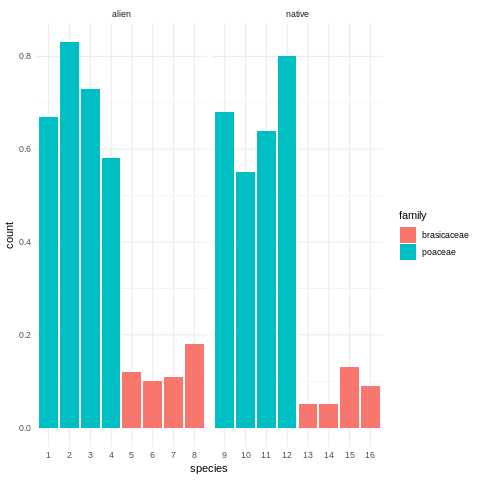

In [0]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)

df.surv2 <- df.surv%>%
  group_by(species,family ,native_stat)%>%
  summarise(tot=sum(marked),surv=sum(survived))%>%
  mutate(prop=surv/tot)
df.surv2 <- as.data.frame(df.surv2)

ggplot(data = df.surv2) +
  aes(x = species, fill = family, weight = prop) +
  geom_bar() +
  theme_minimal() +
  facet_grid(.~native_stat, scales = "free", space = "free")

## Fecundity

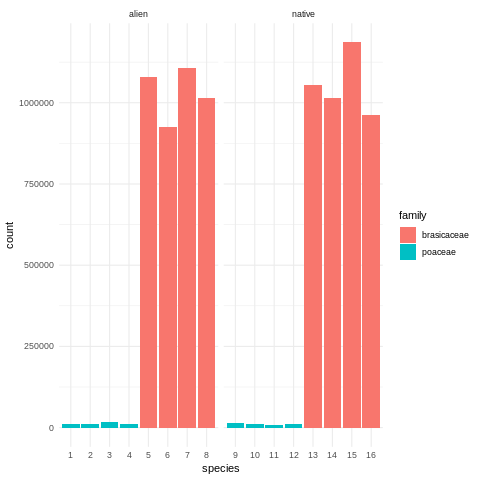

In [0]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)

ggplot(data = df.fec) +
  aes(x = species, fill = family, weight = fecundity) +
  geom_bar() +
  theme_minimal() +
  facet_grid(.~native_stat, scales = "free", space = "free")

## Geometric population growth rate

In [0]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)

ggplot(data = df.pop2) +
  aes(x = species, y = geomean, fill = native_stat) +
  geom_boxplot() +
  theme_minimal() +
  facet_grid(.~family, scales = "free", space = "free")


df.final1 <- df.final%>%
  filter(family%in%c("brasicaceae"))

ggplot(data = df.final1) +
  aes(x = prop, y = meanlam, color = native_stat)+
  geom_point() +
  theme_minimal() +
  facet_wrap(vars(family))

df.final2 <- df.final%>%
  filter(family%in%c("poaceae"))

ggplot(data = df.final2) +
  aes(x = prop, y = meanlam, color = native_stat)+
  geom_point() +
  theme_minimal() +
  facet_wrap(vars(family))

ggplot(data = df.final1) +
  aes(x = meanfec, y = meanlam, color = native_stat) +
  geom_point() +
  theme_minimal() +
  facet_wrap(vars(family))

ggplot(data = df.final2) +
  aes(x = meanfec, y = meanlam, color = native_stat) +
  geom_point() +
  theme_minimal() +
  facet_wrap(vars(family))

ggplot(data = df.final1) +
  aes(x = prod, y = meanlam, color = native_stat) +
  geom_point() +
  theme_minimal() +
  facet_wrap(vars(family))



In [0]:
ggplot(data = df.final2) +
  aes(x = prod, y = meanlam, color = native_stat) +
  geom_point() +
  theme_minimal() +
  facet_wrap(vars(family))

## Data visualization

The first step in data analysis is data visualization.
I would argue that proper data visualization is more important than any statistical work, and that most (if not all) of your conclusions should be clealy explained from your graphs.
Statistics are included to make your conclusions more robust, but on their own the statistics are actually pretty weak.

?Include the anscombe quartet to prove the point?

# Evolution of Herbicide resistance

**Strategy**

1. What is herbicide resistance?

    1. Heritable trait that allows a plant to survive the field rate of herbicide.
    1. Can be either target site or metabolic.

1. How does evolution to herbicide resistance occur?

    1. Herbicide as a strong selection agent: plants generally don't survive without resistance.
    1. Heritable traits, variation within the population, affects plant fitness, highly competitive environment.

1. How can we model it?

    1. Start simple: Exponential model with 3 variants (RR, Rr, rr).
    1. Add carrying capacity.
    1. Matrix model approach to calculate $\lambda$
        1. Herbicide affects seedling survival, nothing else.
        1. 


# Appendix

I will try to provide some extra worked examples for coding problems here.
However, there are extremely good online resources for learning Python.
Here are two to get you started.
Note that you can set the video speed to 1.5x or 1.75x and still be able to follow along.

In [0]:
#@title Learning python
from IPython.display import YouTubeVideo
YouTubeVideo('rfscVS0vtbw', width=600, height=400)

In [0]:
#@title Data analysis and Pandas tutorial
from IPython.display import YouTubeVideo
YouTubeVideo('Iqjy9UqKKuo', width=600, height=400)

## What is a loop?

Loops are common ways of repeating a task multiple times and they're used in many different software languages.
They aren't always the most efficient way to perform a task, however they tend to be much more customizable and clear than pre-packaged functions.

Let's start with a simple **for** loop that lists all the numbers between 1 and 5.



In [0]:
for x in range(1, 6):
  print(x)

Notice that to list all the whole numbers between 1 and 5 we have to set the **range** bound as [1, 6].
This is just how python works, other programs (such as R) do not have this quirk (it has many others instead).

Another "quirk" of python is that it starts counting (and indexing) at zero rather than 1.

Try it for yourself.

Write a **for** loop that displays the whole numbers from 0 to 10.
Write a **for** loop that displays the whole numbers from 13 to 22.

In [0]:
for x in range(6):
  print(x)

In [0]:
for x in range(3,6):
  print(x)

There are a few different loop types.
We use a **while** loop for the population simulation.
This type of loop will continue performing an action so long as a condition remains true.
For the population model that condition was that the year number was less than some total year number (effectively the same as the **for** loop in that scenario).


### Use case for loops: Examples
#### Summation

What if we wanted to add all the whole numbers between 1 and 10?
That is, what if we wanted:

$$\sum_{i=1}^{10}i$$

We could do this on a calculator, however, if the range of values was a lot larger this would take us some time.
Instead, why not write a loop?

In [0]:
a=0
for i in range(1,11):
  a += i # Note that a += i is equal to a = a + i

print(a)

#### Multiplication

We can, of course, do this for multiplication as well.
Just be careful not to set our starting value to 0 as we did for the summation.

$$\prod_{i=1}^{5}i$$

In [0]:
a=1
for i in range(1,6):
  a=a*i
print(a)

#### Simulation experiments

We used a **while** loop to perform our population simulation.
Practiacally, we wanted to track the population change year to year over several years using a simple exponential relationship.
We could have done that manually but why?
Do it with loops.

Thie 

#Random number generation



In [0]:
#@title Default title text
import pylab
import random
samples = 1000
dice = []
for i in range(samples):
    total = random.randint(1,6) + random.randint(1,6)
    dice.append(total)
pylab.hist(dice, bins= pylab.arange(1.5,12.6,1.0))
pylab.show()

norm = []
norm.append(random.normalvariate(50,1))
print(norm)

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
import graphviz

In [0]:
class Excelish:
  def __init__(self):
    self.data = {} #this is a dictionary. composed of key:value pairs
    
  def add_column_name(self,col_name):
    self.data[col_name] = [] #initialize as blank list
    
  def add_data(self,col_name, data):
    self.data[col_name] = data #add a list of data to a column name
    
  def get_output(self):
    output = ""
    #need to either input how many rows to print, or will have to figure out the max length
    max_len = 0
    for column in self.data.keys():
      if max_len < len(self.data[column]):
        max_len = len(self.data[column])
      output = output + "\t"+column #tab delimited values
    #max len now tells us how many lines to print
    for i in range(max_len):
      output = output +"\n" + str(i+1)
      for column in self.data.keys():
        try:
          output = output + "\t"+ str(self.data[column][i])
        except IndexError:
          #if columns have different length of lists then indexing out of range is a problem
          output = output + "\t" + "n/a"
    return output #could either return it, or just print it. nicer to return it i think
      
excel = Excelish()
excel.add_column_name("first_column")
excel.add_column_name("second_column")
excel.add_data("first_column", ["list", "of", "data", "probably", "numbers",1,2, 3, "etc"])
excel.add_data("second_column", [1, 2, 3, 4, 5, "a"])
print(excel.get_output())

# Population Demographic Analysis
## CPSC 593
---

Learning points (language kept loose atm)

1. What is population demographic analysis?
1. Why does it matter? (Weed control, GMO, invasive species)
1. Examples of population demographics using weeds or crops.
1. Plant lifecycles
1. Many little hammers of control, herbicide resistance


1. Explain the lifecycle of an annual plant.
1. Develop a "for" loop in python to mimic basic math operations.
1. Identify control points in the life cycle of an annual weed.
1. Exaplin components of demographic analysis.

Additional learning points (possibly concurrent with above?)

1. What is Python?
1. What is a loop?
1. Deterministic vs stochastic models

## Structure

1. Introduction: What elements of learning will we tackle, and how will we tackle them?
1. Invasive/ephemeral plants in ecology and agriculture.

$$\frac{a}{b}$$

$$\sum{a}_{i}^{n}$$

$$\sum_{i}^{n}{a}$$


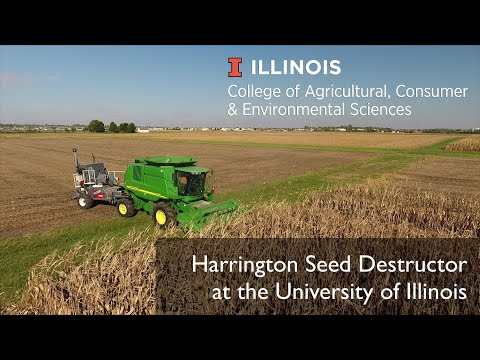

In [0]:
#@title Messing with python options
#@markdown Here's an example of how we could link youtube into our lab instructions.
#@markdown This is a drone video of the HSD at Adam's plots (real UIUC footage)
#@markdown This could be a CPSC grad student explaining why something matters, and maybe even giving an example of the lab project in real life. Reading rainbow style, but age appropriate.
from IPython.display import YouTubeVideo
YouTubeVideo('wnI0a6cunzM', width=600, height=400)

## What is population demographic analysis?

# Messing around with using R within python as well as importing data

In [0]:
%load_ext rpy2.ipython

In [0]:
%%R # Using R from within Python! Nothing can stop me now!

library(ggplot2)
library(tidyr)
library(dplyr)

set.seed(90210)

dat = data.frame(e = rnorm(20, 0, 5),
                x = seq(1,20,1))
b1 = 1
b0 = 30

dat1 = dat%>%
      mutate(y = b0 + b1*x + e)

plot = ggplot(dat1, aes(x = x, y = y))
plot = plot + geom_point()
plot

In [0]:
%%R
fit = lm(data = dat1, y ~ x)
summary(fit)

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['pop_growth.csv']))
df2

#df2.boxplot(by='family', 
#                       column=['secondyear'], 
#                       grid=False)

In [0]:
#@title
%%R
library(ggplot2)

df1 = read.csv("pop_growth.csv")
plot = ggplot(df1, aes(y=secondyear,group=family))
plot = plot + geom_boxplot()
plot